In [44]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("Tel.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df[pd.to_numeric(df.TotalCharges, errors ='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df1 = df[df.TotalCharges!= " "]
df1.shape

(7032, 20)

In [7]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_23894/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [9]:
df1.TotalCharges.dtypes

dtype('float64')

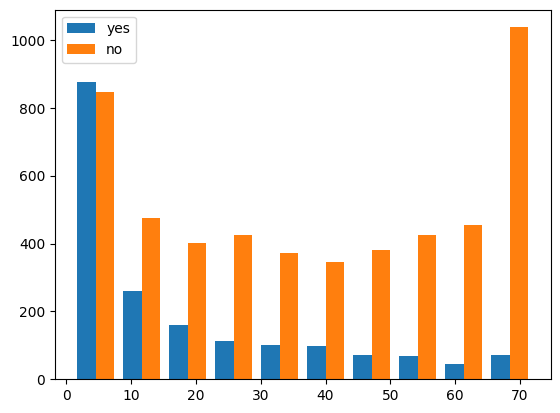

In [10]:
df1_churn_no = df1[df1.Churn == 'No'].tenure
df1_churn_yes = df1[df1.Churn == 'Yes'].tenure
plt.hist([df1_churn_yes, df1_churn_no], label= ['yes', 'no'])
plt.legend()

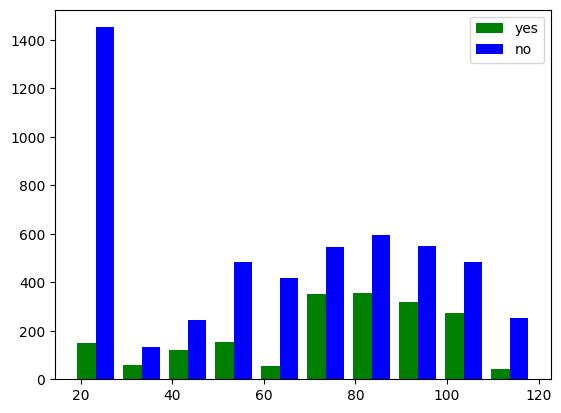

In [11]:
df1_mchurn_no = df1[df1.Churn == 'No'].MonthlyCharges
df1_mchurn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
plt.hist([df1_mchurn_yes, df1_mchurn_no], color = ['green','blue'], label= ['yes', 'no'])
plt.legend()

In [12]:
def print_unique_col(df1):
    for col in df1:
         if df1[col].dtypes == 'object':
             print(f'{col}, {df1[col].unique()}')
        
   

print_unique_col(df1)


gender, ['Female' 'Male']
Partner, ['Yes' 'No']
Dependents, ['No' 'Yes']
PhoneService, ['No' 'Yes']
MultipleLines, ['No phone service' 'No' 'Yes']
InternetService, ['DSL' 'Fiber optic' 'No']
OnlineSecurity, ['No' 'Yes' 'No internet service']
OnlineBackup, ['Yes' 'No' 'No internet service']
DeviceProtection, ['No' 'Yes' 'No internet service']
TechSupport, ['No' 'Yes' 'No internet service']
StreamingTV, ['No' 'Yes' 'No internet service']
StreamingMovies, ['No' 'Yes' 'No internet service']
Contract, ['Month-to-month' 'One year' 'Two year']
PaperlessBilling, ['Yes' 'No']
PaymentMethod, ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn, ['No' 'Yes']


In [13]:
df1.replace( 'No internet service','No', inplace = True)
df1.replace( 'No phone service','No', inplace = True)
print_unique_col(df1)

gender, ['Female' 'Male']
Partner, ['Yes' 'No']
Dependents, ['No' 'Yes']
PhoneService, ['No' 'Yes']
MultipleLines, ['No' 'Yes']
InternetService, ['DSL' 'Fiber optic' 'No']
OnlineSecurity, ['No' 'Yes']
OnlineBackup, ['Yes' 'No']
DeviceProtection, ['No' 'Yes']
TechSupport, ['No' 'Yes']
StreamingTV, ['No' 'Yes']
StreamingMovies, ['No' 'Yes']
Contract, ['Month-to-month' 'One year' 'Two year']
PaperlessBilling, ['Yes' 'No']
PaymentMethod, ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn, ['No' 'Yes']


/tmp/ipykernel_23894/2836393892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace( 'No internet service','No', inplace = True)
/tmp/ipykernel_23894/2836393892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace( 'No phone service','No', inplace = True)


In [14]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
             'StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_col:
    df1[i].replace({'Yes':1, 'No': 0}, inplace= True)
    

/tmp/ipykernel_23894/699606472.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].replace({'Yes':1, 'No': 0}, inplace= True)
/tmp/ipykernel_23894/699606472.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[i].replace({'Yes':1, 'No': 0}, inplace= True)
/tmp/ipykernel_23894/699606472.py:

In [15]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')
        

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [16]:
df1.gender.replace({'Male':1, 'Female': 0}, inplace= True)

/tmp/ipykernel_23894/1024241322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.gender.replace({'Male':1, 'Female': 0}, inplace= True)
/tmp/ipykernel_23894/1024241322.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.gender.replace({'Male':1, 'Female': 0}, inplace= True)
/tmp/ipykernel

In [17]:
df1.gender.unique()

array([0, 1])

In [18]:
df2 = pd.get_dummies(data= df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [19]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4048,0,0,1,1,58,0,0,1,0,1,...,True,False,False,False,False,True,False,False,False,True
446,0,0,0,0,1,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
1498,1,1,0,0,15,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
6474,0,0,0,0,6,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
3703,1,0,0,1,9,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True


In [20]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges'] 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

ModuleNotFoundError: No module named 'sklearn'

In [21]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [ True False]
InternetService_Fiber optic: [False  True]
InternetService_No: [False  True]
Contract_Month-to-month: [ True False]
Contract_One year: [False  True]
Contract_Two year: [False  True]
PaymentMethod_Bank transfer (automatic): [False  True]
PaymentMethod_Credit card (automatic): [False  True]
PaymentMethod_Electronic check: [ True False]
Pa

In [22]:
X = df2.drop('Churn', axis = 'columns')
y = df2.Churn

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=5)

In [27]:
print(f'X_train Shape : {X_train.shape}')
print(f'X_test Shape : {X_test.shape}')


X_train Shape : (4711, 26)
X_test Shape : (2321, 26)


In [28]:
import tensorflow as tf
from tensorflow import keras

In [34]:
model = keras.Sequential([
  keras.layers.Dense(20, input_shape= (26,), activation='relu'),
    keras.layers.Dense(1,  activation='sigmoid'),
])

model.compile(optimizer= 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


/home/sahajgyawali45/tf_venv/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.6608 - loss: 14.3683
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.7487 - loss: 0.6597
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7773 - loss: 0.5938  
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.7644 - loss: 0.7746
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7648 - loss: 0.6869
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7790 - loss: 0.5881
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.7701 - loss: 0.7695
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.7780 - loss: 0.5842
Epoch 9/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7913 - loss: 0.4941
Epoch 10/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.7824 - loss: 0.5523
Epoch 11/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7818 - loss: 0.5529
Epoch 12/100
148/148 ━━━━━━━━━━━

In [35]:
model.evaluate(X_test, y_test)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7906 - loss: 0.4913


[0.4913123846054077, 0.7906075119972229]

In [36]:
yp = model.predict(X_test)
yp[:5]

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step


array([[1.2631516e-01],
       [3.5148746e-01],
       [3.5127095e-04],
       [7.6617318e-01],
       [3.0982989e-01]], dtype=float32)

In [37]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [38]:
y_p = []
for i in yp:
    if i > 0.5:
        y_p.append(1)
    else :
        y_p.append(0)

In [39]:
y_p[:5]

[0, 0, 0, 1, 0]

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1666
           1       0.70      0.45      0.55       655

    accuracy                           0.79      2321
   macro avg       0.75      0.69      0.71      2321
weighted avg       0.78      0.79      0.78      2321



Text(95.72222222222221, 0.5, 'Test')

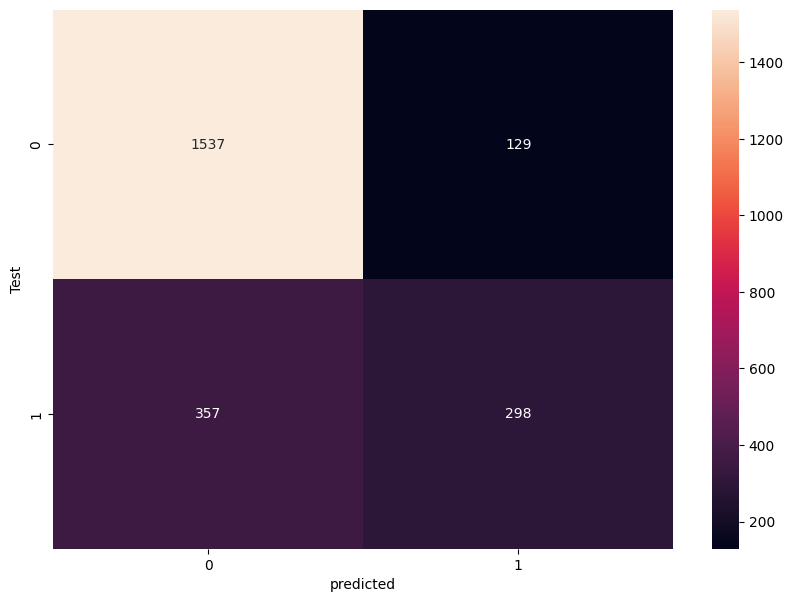

In [46]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_p)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Test')